# Title : Bank Customers Churn Prediction Data

### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Note: In above query we have import libraries pandas,numpy,matplotlib, and seaborn.

### Import Dataset

In [3]:
df=pd.read_csv("bankdata.csv")

### Display data

In [4]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [5]:
# Note : Here we can overall data there are 14 columns and 1 lakh 65 thousand 34 rows.

In [6]:
# Top 5 records display.
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
# Bottom 5 records display.
df.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [8]:
# Shape of data.
df.shape

(165034, 14)

In [9]:
# Size of data.
df.size

2310476

In [10]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Check data types all columns

In [11]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

### Drop unnecessary colmns

In [12]:
df.drop(["id","CustomerId","Surname","NumOfProducts"],axis=1,inplace=True)

In [13]:
# Create a shallow copy of data.
df1=df.copy()

In [14]:
# Check null values present in data.
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Check overall information of data and also statistical summary

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   HasCrCard        165034 non-null  float64
 7   IsActiveMember   165034 non-null  float64
 8   EstimatedSalary  165034 non-null  float64
 9   Exited           165034 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 12.6+ MB


In [16]:
# Note :  Here we can see column wise datatypes,Null value is present in column, how many entries of this data
# also how many rows and columns are present

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Age,165034.0,38.125888,8.867205,18.00,32.00,37.0,42.0000,92.00
Tenure,165034.0,5.020353,2.806159,0.00,3.00,5.0,7.0000,10.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
HasCrCard,165034.0,0.753954,0.430707,0.00,1.00,1.0,1.0000,1.00
IsActiveMember,165034.0,0.497770,0.499997,0.00,0.00,0.0,1.0000,1.00
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48
Exited,165034.0,0.211599,0.408443,0.00,0.00,0.0,0.0000,1.00


In [18]:
# Check the unique values of Gender
df1["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df1["Gender"].value_counts(normalize=True)*100

Gender
Male      56.442915
Female    43.557085
Name: proportion, dtype: float64

In [20]:
# Note : Here 56% of male are there and 43% of female

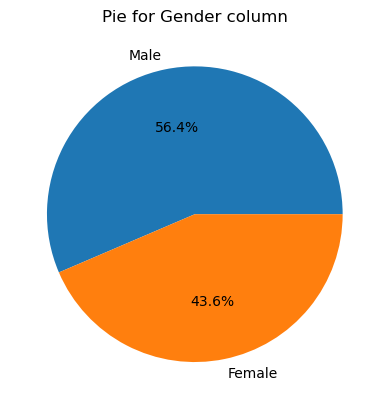

In [21]:
plt.pie(df1["Gender"].value_counts(normalize=True)*100,labels=["Male","Female"],autopct='%1.1f%%')
plt.title("Pie for Gender column")
plt.show()

In [22]:
df1["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [23]:
df1["Geography"].value_counts(normalize=True)*100

Geography
France     57.088236
Spain      21.942751
Germany    20.969012
Name: proportion, dtype: float64

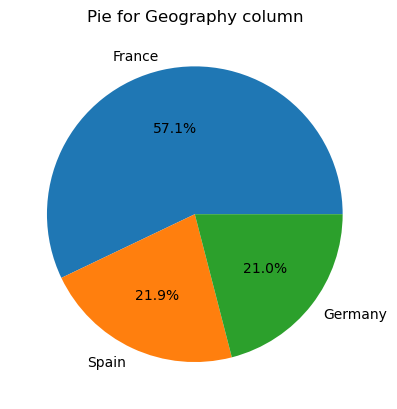

In [24]:
plt.pie(df1["Geography"].value_counts(normalize=True)*100,labels=['France', 'Spain', 'Germany'],autopct='%1.1f%%')
plt.title("Pie for Geography column")
plt.show()

### Convert categorical data into numerical using LabelEncoding

In [25]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [26]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [27]:
le=LabelEncoder()

In [28]:
df1["Geography"]=le.fit_transform(df1["Geography"])
df1["Gender"]=le.fit_transform(df1["Gender"])

In [29]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.0,1.0,1.0,49503.50,0


### Check Outliers

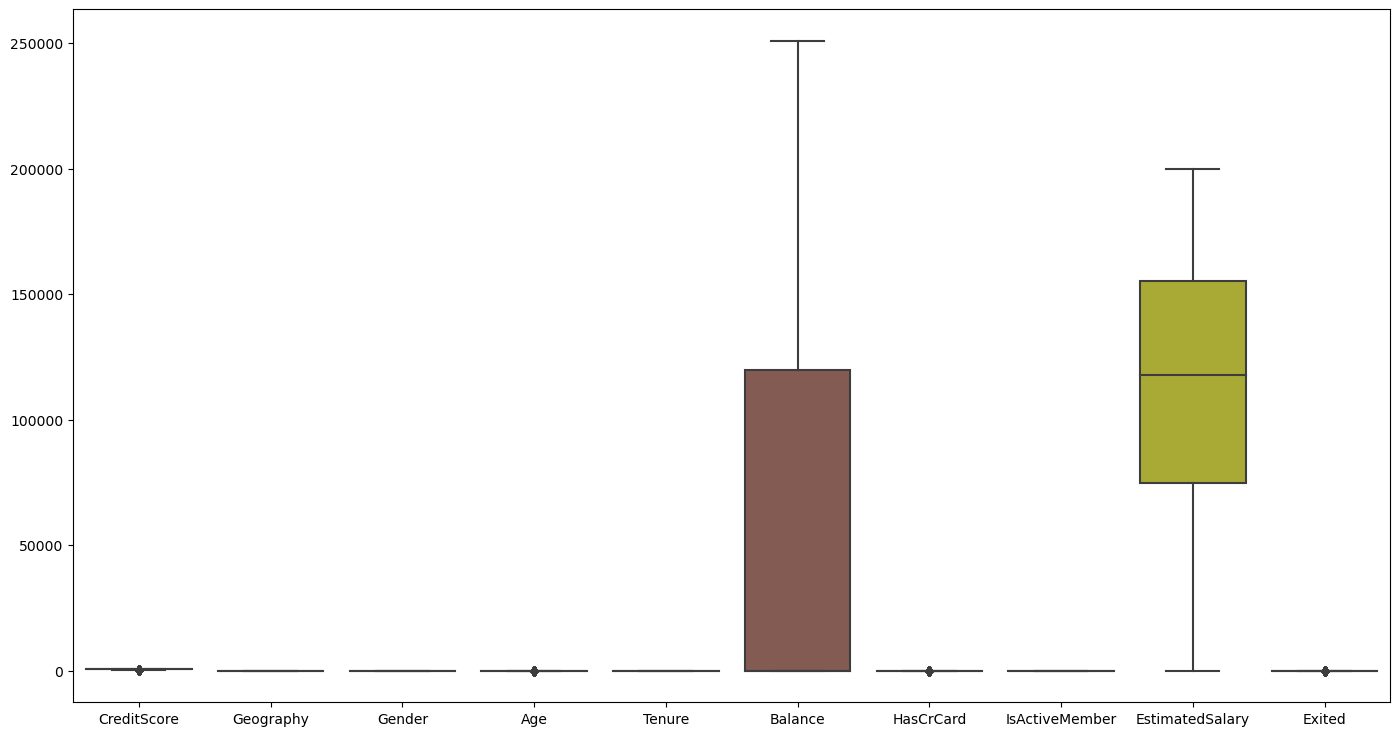

In [30]:
plt.figure(figsize=(17,9))
sns.boxplot(df1)
plt.show()

In [31]:
# Note : In the dataset there is no outliers present.

### Check Skewness

In [32]:
df1.skew()

CreditScore       -0.059291
Geography          0.725460
Gender            -0.259886
Age                0.968063
Tenure             0.006490
Balance            0.382020
HasCrCard         -1.179255
IsActiveMember     0.008920
EstimatedSalary   -0.309022
Exited             1.412215
dtype: float64

In [33]:
# Here the skewness is negligible.

### Split data in x and y

In [34]:
x=df1.drop(["Exited"],axis=1)

In [35]:
y=df1["Exited"]

### Scaling

In [36]:
# Import a zscore scaling which is similar to standard scaling.
from scipy.stats import zscore

In [37]:
# Apply the scaling. 
x_sc=x.apply(zscore)

In [38]:
x_sc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
0,0.144135,-0.794229,0.878465,-0.578074,-0.719973,-0.883163,0.571263,-0.99555,1.369486
1,-0.367706,-0.794229,0.878465,-0.578074,-1.432694,-0.883163,0.571263,1.00447,-1.254085
2,0.268974,-0.794229,0.878465,0.211354,1.774548,-0.883163,0.571263,-0.99555,1.437422
3,-0.941966,-0.794229,0.878465,-0.465299,-1.076334,1.486918,0.571263,1.00447,-0.557018
4,0.743362,1.655035,0.878465,-0.578074,-0.007253,-0.883163,0.571263,1.00447,-1.938770


### Split data in train and test

In [39]:
# Import model for spliting data.
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=1)

## Check all models training and testing score

### 1. Logistic Regression

In [41]:
# Import Logistic Regression.
from sklearn.linear_model import LogisticRegression

In [42]:
# Creating object for Logistic Regression.
lor=LogisticRegression()

In [43]:
lor.fit(x_train,y_train)

LogisticRegression()

In [44]:
# Training score check.
lor.score(x_train,y_train)*100

81.69022618872432

In [45]:
# Testing score check.
lor.score(x_test,y_test)*100

81.90907071155905

In [46]:
# Training Score(82.57) - Testing Score(82.67) =  -0.12

#### Find Precision score, Recall Score, accuracy of model and also confusion matrix

In [47]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix

In [48]:
y_true,y_pred=y_test,lor.predict(x_test)

In [49]:
# Precision Score
precision_score(y_true,y_pred)*100

66.32157194168603

In [50]:
# Recall Score
recall_score(y_true,y_pred)*100

29.88954484860027

In [51]:
# Accuracy Score
accuracy_score(y_true,y_pred)*100

81.90907071155905

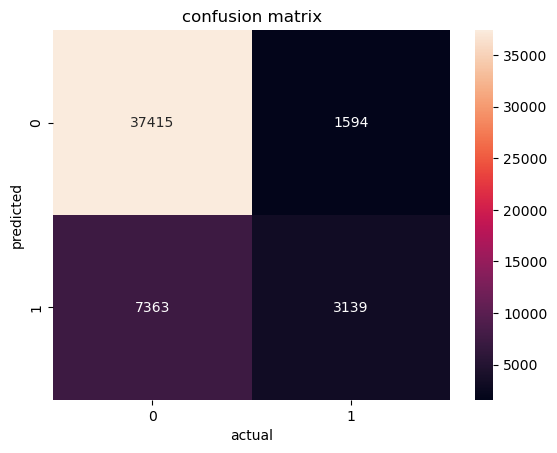

In [52]:
# Plot the Confusion Matrix.
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2. KNN classifier

In [53]:
# Import KNN classifier.
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier()

In [55]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
# Training Score
knn.score(x_train,y_train)*100

86.07636574534942

In [57]:
# Testing Score
knn.score(x_test,y_test)*100

81.6606410696613

In [58]:
# Training Score(88.51) - Testing Score(84.65) =  3.86

#### Find Precision score, Recall Score, accuracy of model and also confusion matrix

In [59]:
y_true,y_pred=y_test,knn.predict(x_test)

In [60]:
# Precision Score
precision_score(y_true,y_pred)*100

59.91355270496375

In [61]:
# Recall Score
recall_score(y_true,y_pred)*100

40.91601599695296

In [62]:
# Accuracy Score
accuracy_score(y_true,y_pred)*100

81.6606410696613

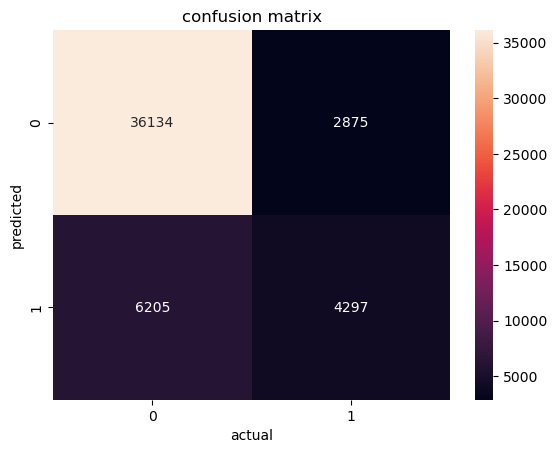

In [63]:
# Plot the confusion matrix.
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 3. Decision Tree Classifier

In [64]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtc =  DecisionTreeClassifier()

In [66]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
# Training Score
dtc.score(x_train,y_train)*100

99.92382469291829

In [68]:
# Testing Score
dtc.score(x_test,y_test)*100

75.4801963200097

In [69]:
# Training Score(99.97) - Testing Score(79.87) =  20.1

#### Find Precision score, Recall Score, accuracy of model and also confusion matrix

In [70]:
y_true,y_pred=y_test,dtc.predict(x_test)

In [71]:
# Precision Score
precision_score(y_true,y_pred)*100

42.50549048316252

In [72]:
# Recall Score
recall_score(y_true,y_pred)*100

44.229670538944966

In [73]:
# Accuracy Score
accuracy_score(y_true,y_pred)*100

75.4801963200097

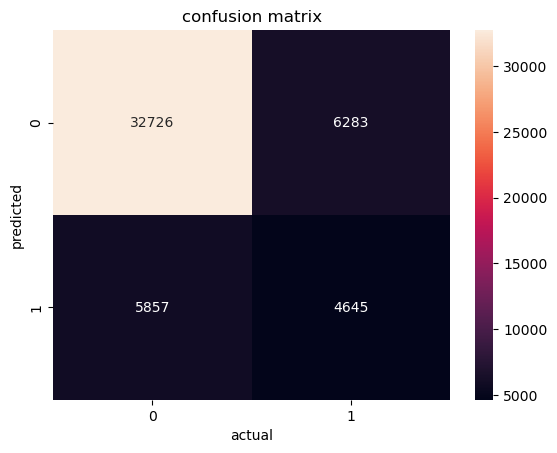

In [74]:
# Plot the Confusion Matrix.
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 4.Bagging Classifier

In [75]:
# Import Bagging Classifier
from sklearn.ensemble import BaggingClassifier

In [76]:
bgc=BaggingClassifier()

In [77]:
bgc.fit(x_train,y_train)

BaggingClassifier()

In [78]:
# Training Score
bgc.score(x_train,y_train)*100

98.1060048648321

In [79]:
# Testing Score
bgc.score(x_test,y_test)*100

81.97774231988852

In [80]:
# Training Score(98.45) - Testing Score(84.90) =  13.55

#### Find Precision score, Recall Score, accuracy of model and also confusion matrix

In [81]:
y_true,y_pred=y_test,bgc.predict(x_test)

In [82]:
# Precision Score
precision_score(y_true,y_pred)*100

62.330157738560054

In [83]:
# Recall Score
recall_score(y_true,y_pred)*100

38.00228527899448

In [84]:
# Accuracy Score
accuracy_score(y_true,y_pred)*100

81.97774231988852

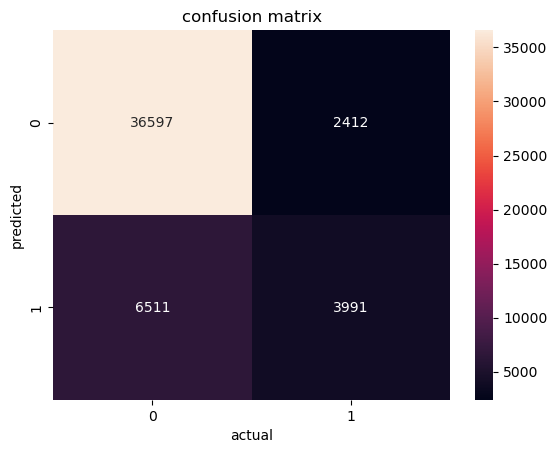

In [85]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 5. Ada Boost Classifier

In [86]:
# Import Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

In [87]:
ada=AdaBoostClassifier()

In [88]:
ada.fit(x_train,y_train)

C:\Users\Vaishnavi Chavan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [89]:
# Training Score
ada.score(x_train,y_train)*100

83.56431186863222

In [90]:
# Testing Score
ada.score(x_test,y_test)*100

83.63192017935408

In [91]:
# Training Score(86.06) - Testing Score(86.01) =  0.05

#### Find Precision score, Recall Score, accuracy of model and also confusion matrix

In [92]:
y_true,y_pred=y_test,ada.predict(x_test)

In [93]:
# Precision Score
precision_score(y_true,y_pred)*100

69.29514000643707

In [94]:
# Recall Score
recall_score(y_true,y_pred)*100

41.001713959245855

In [95]:
# Accuracy Score
accuracy_score(y_true,y_pred)*100

83.63192017935408

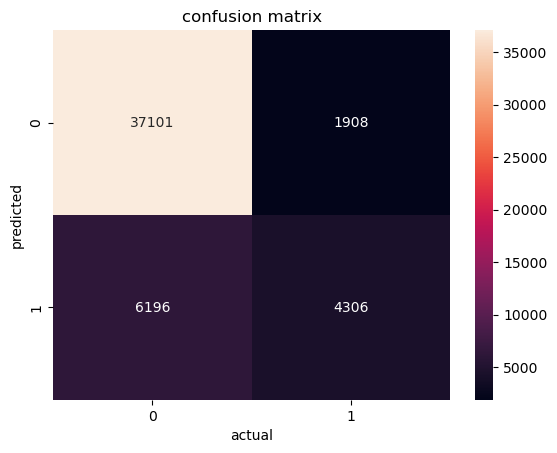

In [96]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 6. Random Forest Classifier

In [97]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc=RandomForestClassifier()

In [99]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
# Training Score
rfc.score(x_train,y_train)*100

99.9212278074496

In [101]:
# Testing Score
rfc.score(x_test,y_test)*100

83.16535719335097

In [102]:
# Training Score(99.97) - Testing Score(85.74) =  14.23

#### Find Precision score, Recall Score, accuracy of model and also confusion matrix

In [103]:
y_true,y_pred=y_test,rfc.predict(x_test)

In [104]:
# Precision Score
precision_score(y_true,y_pred)*100

67.00674933291478

In [105]:
# Recall Score
recall_score(y_true,y_pred)*100

40.64940011426395

In [106]:
# Accuracy Score
accuracy_score(y_true,y_pred)*100

83.16535719335097

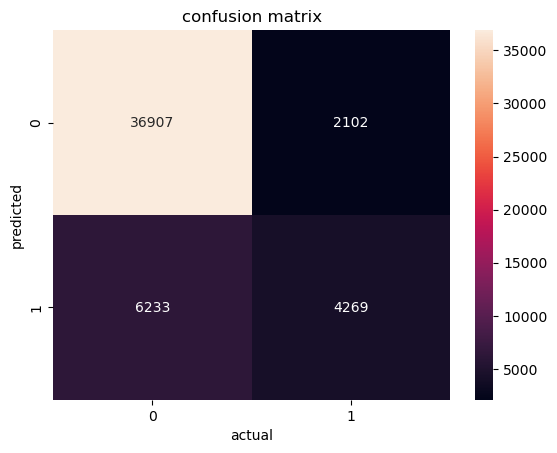

In [107]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 7. Gradient Boosting Classifier

In [108]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gbc=GradientBoostingClassifier()

In [110]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [111]:
# training score 
gbc.score(x_train,y_train)*100

83.8430442422721

In [112]:
# Testing Score
gbc.score(x_test,y_test)*100

83.9389226636505

In [113]:
# Training Score(86.48) - Testing Score(86.43) =  0.05

#### Find Precision score, Recall Score, accuracy of model and also confusion matrix

In [114]:
y_true,y_pred=y_test,gbc.predict(x_test)

In [115]:
# Precision Score
precision_score(y_true,y_pred)*100

71.58821537419573

In [116]:
# Recall Score
recall_score(y_true,y_pred)*100

40.25899828604075

In [117]:
# Accuracy Score
accuracy_score(y_true,y_pred)*100

83.9389226636505

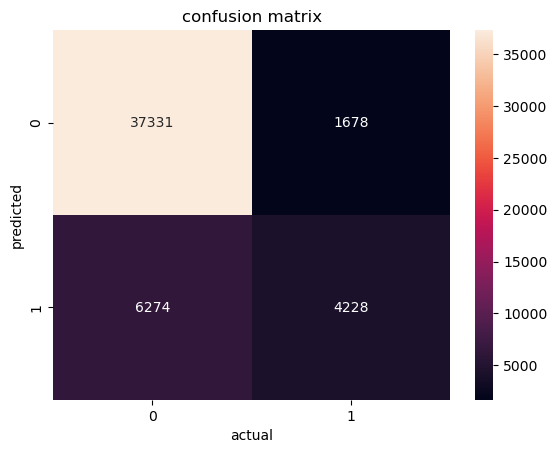

In [118]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

## Model Evaluation

In [119]:
model_evaluation=pd.DataFrame(data={
    "Algorithm ": ["Logistic Regression","k-Nearest Neighbors Classsifier","Decision Tree Classifier","Bagging","Ada Boost Classifier","Random Forest Classifier","Gradient Boost classifier"],
    "Trainig Score" :[82.57,88.51,99.97,98.45,86.06,99.97,86.84],
    "Testing Score" : [82.69,84.65,79.87,84.90,86.01,85.74,86.43],
    "Error" : [-0.12,3.86,20.1,13.55,0.05,14.23,0.05],
    "Accuracy" : [82.69,84.65,79.87,84.90,86.01,85.74,86.43]
})

In [120]:
model_evaluation

,Algorithm,Trainig Score,Testing Score,Error,Accuracy
0,Logistic Regression,82.57,82.69,-0.12,82.69
1,k-Nearest Neighbors Classsifier,88.51,84.65,3.86,84.65
2,Decision Tree Classifier,99.97,79.87,20.10,79.87
3,Bagging,98.45,84.90,13.55,84.90
4,Ada Boost Classifier,86.06,86.01,0.05,86.01
5,Random Forest Classifier,99.97,85.74,14.23,85.74
6,Gradient Boost classifier,86.84,86.43,0.05,86.43


## Conclusion